In [1]:
import pandas as pd
import os
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# estimate total, coding and noncoding het
template_dir = "/mnt/seagate10/genotypes/ldsc489eur10m"
coding_snps_f = "/mnt/seagate10/genotypes/ldsc489eur10m/annot/annot.ldsc489eur10m.utr5utr3exon.snps.txt"
frq_file_prefix = "1000G.EUR.QC."

coding_het = 0
noncoding_het = 0
total_het = 0 # total_het = coding_het + noncoding_het

coding_snps = pd.read_csv(coding_snps_f,header=None,names=["SNP"],na_filter=False,squeeze=True)
n_coding = coding_snps.size
n_total = 0 # n_total = n_coding + n_noncoding

for c in range(1,23):
    fname = os.path.join(template_dir, f"{frq_file_prefix}{c}.maf.frq")
    maf = pd.read_csv(fname,delim_whitespace=True,na_filter=False,usecols=["SNP","MAF"],index_col="SNP",squeeze=True)
    n_total += maf.size
    i_coding = maf.index.isin(coding_snps)
    maf_coding = maf[i_coding]
    total_het += (2*maf*(1-maf)).sum()
    coding_het += (2*maf_coding*(1-maf_coding)).sum()

n_noncoding = n_total - n_coding
noncoding_het = total_het - coding_het

print(f"{n_total} total SNPs")
print(f"{n_coding} coding SNPs")
print(f"{n_noncoding} noncoding SNPs")

print(f"total het     = {total_het}")
print(f"coding het    = {coding_het}")
print(f"noncoding het = {noncoding_het}")

FileNotFoundError: [Errno 2] File b'/mnt/seagate10/genotypes/ldsc489eur10m/annot/annot.ldsc489eur10m.utr5utr3exon.snps.txt' does not exist: b'/mnt/seagate10/genotypes/ldsc489eur10m/annot/annot.ldsc489eur10m.utr5utr3exon.snps.txt'

In [3]:
out_dir = "/mnt/seagate10/projects/cmm/experiments/e1_real/results/tables"
results_dir = "/mnt/seagate10/projects/cmm/experiments/e1_real/results"
trait2use = ["CTG_COG_2018",
"CTG_INTELLIGENCE_2017",
"DIAGRAM_T2D_2018_adjBMI",
"GIANT_BMI_2018_UKB_v2",
"GIANT_HEIGHT_2014",
"GIANT_HEIGHT_2018_UKB",
"GIANT_WHR_2015_EUR",
"IIBDGC_IBD_2017",
"LIPIDS_LDL_2013",
"PGC_ADHD_2017_EUR",
"PGC_BIP_2016",
"PGC_MDD_2018_no23andMe",
"PGC_SCZ_2014_EUR",
"SSGAC_EDU_2018_no23andMe"]
nrep = 50
par2take = ["p_opt","sb2_opt","s02_opt","success","fun","nit","nfev","global_nfev","global_fun"]

out_cols = ["i_repeat","p_nc","p_c","s2_nc","s2_c","h2","h2_nc","h2_c","s02",
            "success","cost","total_nfev","loc_nfev","loc_nit","glob_nfev","glob_cost"]

coding_het = 31810.875463335004
noncoding_het = 2354771.7853046902

for trait in trait2use:
    df = pd.DataFrame(columns=out_cols)
    print(f"processing {trait}")
    for i in range(1,nrep+1):
        fname = f"optimize.{trait}.{i}.npz"
        fname = os.path.join(results_dir,fname)
        
        res = np.load(fname)
        # i_noncoding = 0, i_coding = 1
        p_nc, p_c = res["p_opt"]
        s2_nc, s2_c = res["sb2_opt"]
        h2_c = p_c*s2_c*coding_het
        h2_nc = p_nc*s2_nc*noncoding_het
        h2 = h2_c + h2_nc
        s02 = res["s02_opt"]
        success = res["success"]
        cost = res["fun"]
        loc_nfev = res["nfev"]
        loc_nit = res["nit"]
        glob_nfev = res["global_nfev"]
        glob_cost = res["global_fun"]
        total_nfev = glob_nfev + loc_nfev
        out_vals = [i, p_nc, p_c, s2_nc, s2_c, h2, h2_nc, h2_c, s02,
                    success, cost, total_nfev, loc_nfev, loc_nit, glob_nfev, glob_cost]
        df.loc[i,:] = out_vals
    out_fname = os.path.join(out_dir, f"{trait}.csv")
    df.to_csv(out_fname, index=False)
    print(f"{out_fname} created")
        

processing CTG_COG_2018
/mnt/seagate10/projects/cmm/experiments/e1_real/results/tables/CTG_COG_2018.csv created
processing CTG_INTELLIGENCE_2017
/mnt/seagate10/projects/cmm/experiments/e1_real/results/tables/CTG_INTELLIGENCE_2017.csv created
processing DIAGRAM_T2D_2018_adjBMI
/mnt/seagate10/projects/cmm/experiments/e1_real/results/tables/DIAGRAM_T2D_2018_adjBMI.csv created
processing GIANT_BMI_2018_UKB_v2
/mnt/seagate10/projects/cmm/experiments/e1_real/results/tables/GIANT_BMI_2018_UKB_v2.csv created
processing GIANT_HEIGHT_2014
/mnt/seagate10/projects/cmm/experiments/e1_real/results/tables/GIANT_HEIGHT_2014.csv created
processing GIANT_HEIGHT_2018_UKB
/mnt/seagate10/projects/cmm/experiments/e1_real/results/tables/GIANT_HEIGHT_2018_UKB.csv created
processing GIANT_WHR_2015_EUR
/mnt/seagate10/projects/cmm/experiments/e1_real/results/tables/GIANT_WHR_2015_EUR.csv created
processing IIBDGC_IBD_2017
/mnt/seagate10/projects/cmm/experiments/e1_real/results/tables/IIBDGC_IBD_2017.csv created


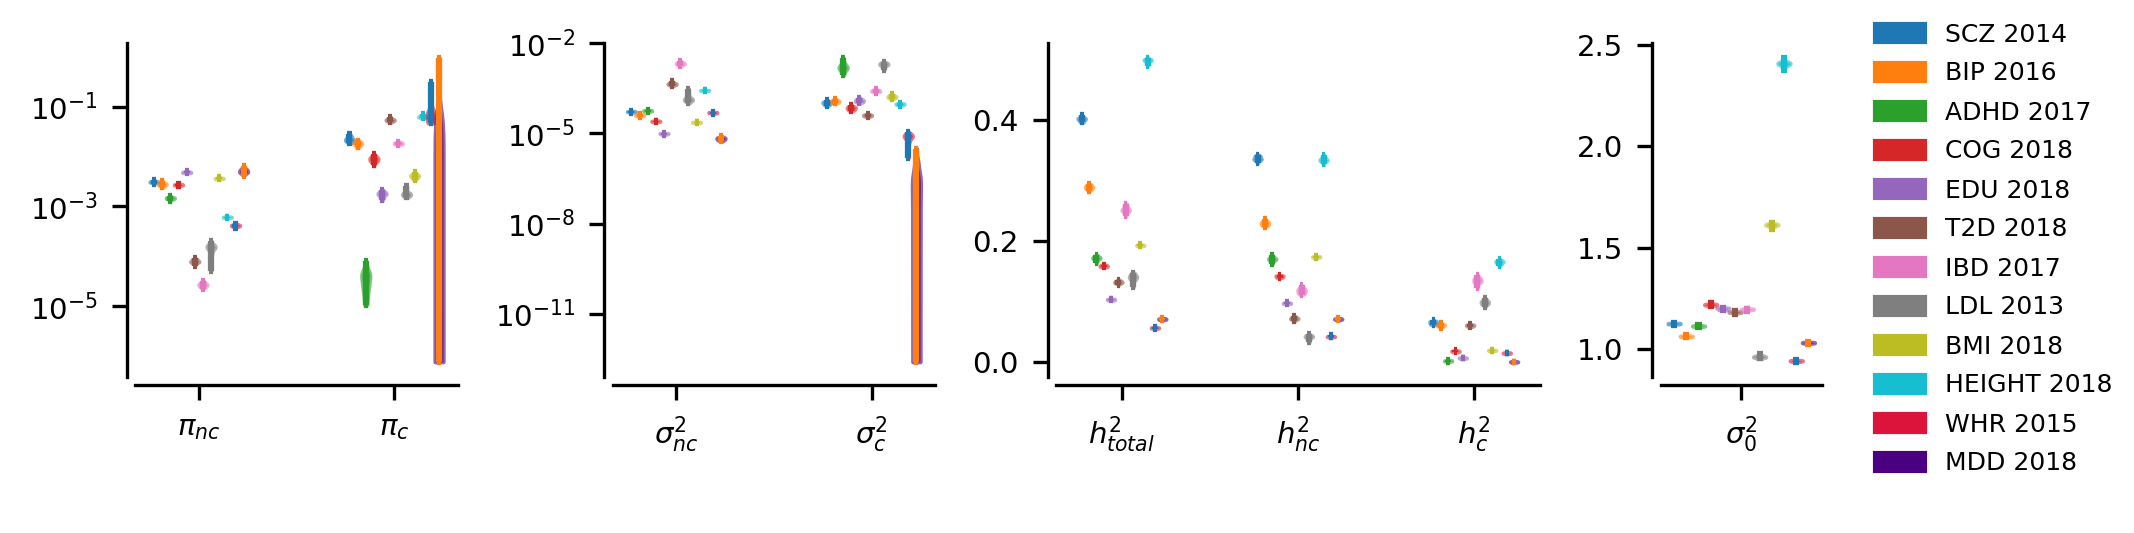

In [3]:
# box plots
tables_dir = "../../cmm_paper/data/e1_real"
trait2plot = [
"PGC_SCZ_2014_EUR",
"PGC_BIP_2016",
"PGC_ADHD_2017_EUR",
"CTG_COG_2018",
"SSGAC_EDU_2018_no23andMe",
"DIAGRAM_T2D_2018_adjBMI",
"IIBDGC_IBD_2017",
"LIPIDS_LDL_2013",
"GIANT_BMI_2018_UKB_v2",
"GIANT_HEIGHT_2018_UKB",
"GIANT_WHR_2015_EUR",
"PGC_MDD_2018_no23andMe",
]

# plt.set_cmap('tab10')

df_dict = OrderedDict((t,pd.read_csv(os.path.join(tables_dir,f"{t}.csv"))) for t in trait2plot)

cols2plot = [["p_nc","p_c"], ["s2_nc","s2_c"], ["h2","h2_nc","h2_c"], ["s02"]]
col_labels = [['$\pi_{nc}$', '$\pi_{c}$'], ['$\sigma^{2}_{nc}$', '$\sigma^{2}_{c}$'],
              ['$h^{2}_{total}$', '$h^{2}_{nc}$', '$h^{2}_{c}$'], ['$\sigma^{2}_{0}$']]
group_width = 0.5
width = group_width/len(trait2plot)

colors = list(plt.cm.tab10(np.arange(10))) + ["crimson", "indigo"]

def plot_ax(ax, cols, df_dict):
    for i, (trait, df) in enumerate(df_dict.items()):
        pos = np.arange(len(cols)) + width*(i+0.5)
        data = df.loc[:,cols].values
        vplot = ax.violinplot(data,positions=pos,widths=width,showextrema=True,showmedians=True)
        
        # fill with colors and legend handles
        legend_handles = []
        color = colors[i]
        for pc in vplot['bodies']:
            pc.set_facecolor(color)
            pc.set_edgecolor(color)
            pc.set_alpha(0.6)
    

plt.rcParams["font.size"] = 7
fig, axs = plt.subplots(nrows=1, ncols=len(cols2plot)+1, figsize=(7,1.5), constrained_layout=True,
                        gridspec_kw={'width_ratios':[len(l) for l in cols2plot]+[1]}, dpi=300)

for ax, cols, labels in zip(axs[:-1],cols2plot,col_labels):
    plot_ax(ax, cols, df_dict)
    ax.set_xticks(np.arange(len(cols)) + 0.5*group_width)
    ax.set_xticklabels(labels)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('outward',2))
    ax.spines['bottom'].set_position(('outward',2))

for i in (0,1):
    axs[i].set_yscale('log')
    
axs[-1].set_axis_off()

legend_handles = []
for i in range(len(trait2plot)):
    color= colors[i]
    patch = mpatches.Patch(color=color)
    legend_handles.append(patch)
legend_labels = [" ".join(t.split("_")[1:3]) for t in trait2plot]
_ = fig.legend(legend_handles,legend_labels,ncol=1,loc ='upper right',labelspacing=0.6,fontsize=6,frameon=False)
fig_file = os.path.join(tables_dir, "parameters.png")
plt.savefig(fig_file)

In [10]:
df = pd.DataFrame({"A":[1,2,3],"B":[5,6,7]})

In [19]:
for t, df in df_dict.items():
    print(f"{t} +++++++")
    s = df.mean(axis=0)
    print(f"{s.n_c:.3f}   {s.n_nc:.3f}   {s.h2:.3f}")

PGC_SCZ_2014_EUR +++++++


AttributeError: 'Series' object has no attribute 'n_c'